In [3]:
#%%writefile -a functions.py

#Here is the final function called snakeID which will Identify the snake species 

from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

def snakeID(model_name, weights, directory, no_images = 1):
    '''
    This is a final function which requires the following inputs: model_name, weights, directory, no_images
    Once all inputs are set, the final output is the images and the identification of the snake species of these images.
    
    INFO FOR INPUTS: 
    - For the model_name, weights they are the filenames with extension (include path if needed), PLEASE enter as strings 
    or objects which are string.
    
    - for the directory its only the path to the main folder, and this main folder must contain a subfolder of your images.
     Do NOT put the path to the subfolder containing images
    
    -The no_images corresponds to how many images you are testing. Integer values only
    '''
    
    
    json_file = open(model_name, 'r') #This is to read the 
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(weights)
    print("Loaded model from disk")

    snake_dict = {0: "DeKay's", 1: "Rattle Snake"}


    test_datagen = ImageDataGenerator(rescale=1./255)

    final_validation_path = directory

    final_validation = test_datagen.flow_from_directory(final_validation_path,target_size=(150, 150),
                                                        class_mode="binary", batch_size=6)

    
    x,y = final_validation.next()
    preds = loaded_model.predict(x)
    
    fig = plt.figure(1, (15, 15))

    k = 0

    for j in range(no_images):
            px = x[j] # Snake's image of snake j; y is the snakes' class
            k += 1
            ax = plt.subplot(7, 7, k)
            ax.imshow(px, cmap ='gray',)
            ax.set_xticks([])
            ax.set_yticks([])

            if  np.rint(preds)[j][0] == 0:#correct prediction
                for axis in ['top','bottom','left','right']:
                    ax.spines[axis].set_linewidth(5)
                    ax.spines[axis].set_color('blue') # Set a green image border
                ax.set_title(snake_dict[int(np.rint(preds)[j][0])])

            else: # Incorrect prediction
                for axis in ['top','bottom','left','right']:
                    ax.spines[axis].set_linewidth(5)
                    ax.spines[axis].set_color('yellow') # Set a red image border 
                ax.set_title(snake_dict[int(np.rint(preds)[j][0])])
            plt.tight_layout()
            


Loaded model from disk
Found 6 images belonging to 1 classes.


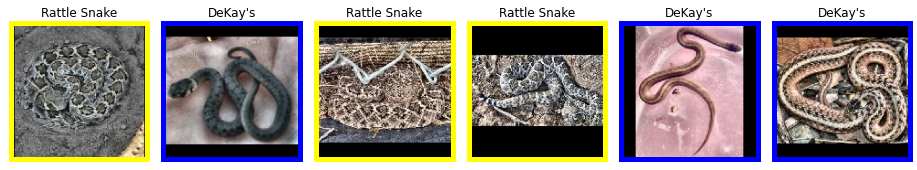

In [4]:
#Please include the correct file path
snakeID('_cnn_models_and_weights/model_second_try.json', '_cnn_models_and_weights/second_try_weights.h5', '_snakes_american_data/final_validation2',  no_images=6)